# Changing the color of my clothes

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2

## Import Image

In [5]:
img = cv2.imread('../../datasets/Me.jpeg')
img = cv2.cvtColor(img, code = cv2.COLOR_BGR2RGB)

## Creating and applying the mask

In [6]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

#Range to find blue
lower = np.array([90, 100, 100])
upper = np.array([130, 255, 255])
maskRange = cv2.inRange(hsv, lower, upper)

#Separated images
noShirt = cv2.bitwise_and(hsv, hsv, mask = ~maskRange)
shirt = cv2.bitwise_and(hsv, hsv, mask = maskRange)

### Graphs

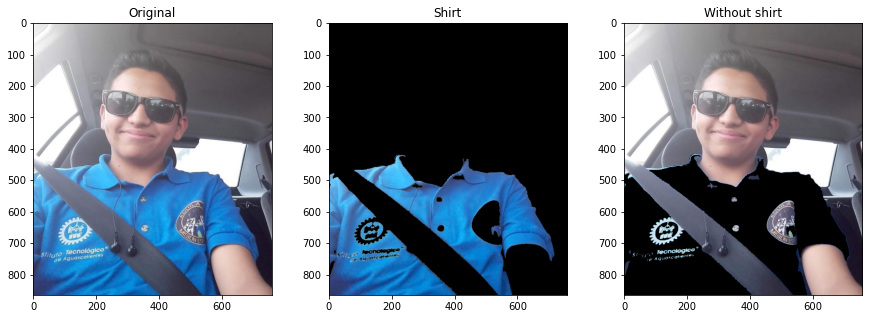

In [7]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.title("Shirt")
plt.imshow(cv2.cvtColor(shirt, cv2.COLOR_HSV2RGB))
plt.subplot(1, 3, 3)
plt.title("Without shirt")
plt.imshow(cv2.cvtColor(noShirt, cv2.COLOR_HSV2RGB))
plt.show()

## Coloring shirt

In [8]:
shirt[:, :, 0] = 60
shirt = cv2.bitwise_and(shirt, shirt, mask = maskRange) #Applying mask again to clean the skin

### Graphs

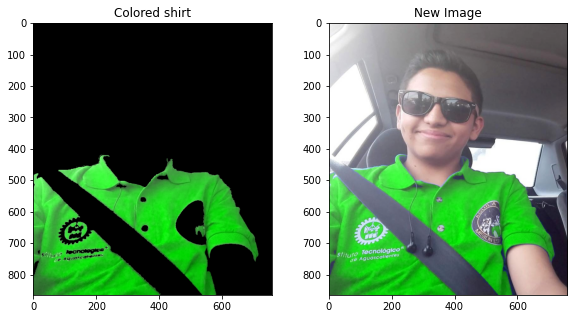

In [9]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.title("Colored shirt")
plt.imshow(cv2.cvtColor(shirt, cv2.COLOR_HSV2RGB))
plt.subplot(1, 3, 2)
plt.title("New Image")
plt.imshow(cv2.cvtColor(shirt + noShirt, cv2.COLOR_HSV2RGB))
plt.show()